# Verify

In [6]:
from torch.utils.data import DataLoader, ConcatDataset
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [7]:
IMAGE_DIR = "/blue/rcstudents/smaley/pokegan/customsprites/blk_bg"
image_size = 64
batch_size = 2400
normalization_stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [8]:
normal_dataset = ImageFolder(IMAGE_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*normalization_stats)]))

mirror_dataset = ImageFolder(IMAGE_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.RandomHorizontalFlip(p=1.0),
    T.ToTensor(),
    T.Normalize(*normalization_stats)]))

dataset_list = [normal_dataset, mirror_dataset]
dataset = ConcatDataset(dataset_list)

dataloader = DataLoader(dataset, batch_size, num_workers=4, shuffle=True, pin_memory=False) # num_workers=4

/apps/pytorch/2.2.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [9]:
def denorm(image):
    return image * normalization_stats[1][0] + normalization_stats[0][0]

In [10]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def show_images(images, nmax=16):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dataloader, nmax=64):
    for images, _ in dataloader:
        show_images(images, nmax)
        break

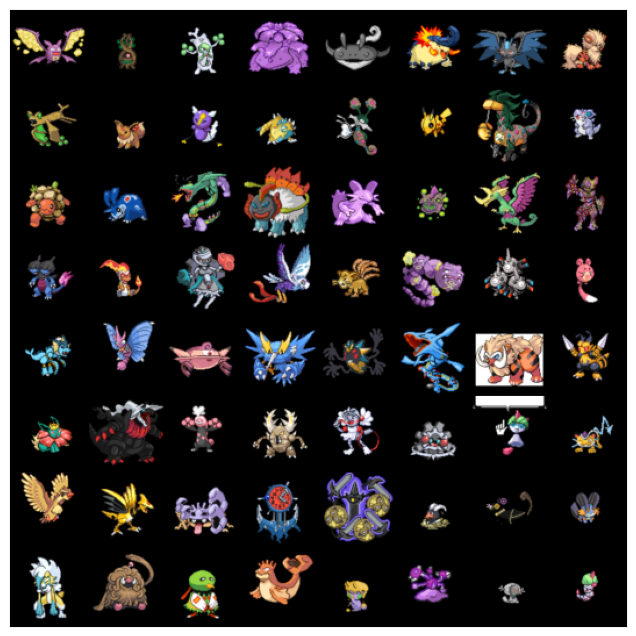

In [14]:
show_batch(dataloader)

# prune dataset

In [ ]:
import os
from PIL import Image

bad_images = set()

base_images = "/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers"
transformed_images = "/blue/rcstudents/smaley/pokegan/customsprites/transformed"

for filename in os.listdir(base_images):
    file_path = os.path.join(base_images, filename)
    if os.path.isfile(file_path):
        try:
            file_name = file_path.split("/")[-1]
            if file_name in bad_images:
                continue
            im = Image.open(file_path)
            if im.format == 'PNG' and im.mode != 'RGBA':
                im = im.convert("RGBA")
                im.save(f"{transformed_images}/{file_name}")
            elif im.format == 'PNG' and im.mode == 'RGBA':
                im.save(f"{transformed_images}/{file_name}")
        except Exception as e:
            print(e)
            bad_images.add(file_name)

cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/92.247a.png'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/desktop.ini'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/334.38.png'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/list_files.bat'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/92.246a.png'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/25.151a.png'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/281.144a.png'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/374.235.png'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers/92.248b.png'
cannot identify image file '/blue/rcstudents/smaley/pokegan/customsprites/Custo

In [1]:
import os

pruned_dataset = "/blue/rcstudents/smaley/pokegan/customsprites/transformed"
print(len([file for file in os.listdir(pruned_dataset) if os.path.isfile(os.path.join(pruned_dataset, file))]))

base_dataset = "/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers"
print(len([file for file in os.listdir(base_dataset) if os.path.isfile(os.path.join(base_dataset, file))]))

144198
144212


In [4]:
from PIL import Image

remove_count = 0

base_images = "/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers"
transformed_images = "/blue/rcstudents/smaley/pokegan/customsprites/blk_bg"

for filename in os.listdir(transformed_images):
    file_path = os.path.join(transformed_images, filename)
    if os.path.isfile(file_path):
        file_name = file_path.split("/")[-1]
        im = Image.open(file_path)
        top_left_pixel = im.getpixel((0, 0))
        is_white = all(channel != 0 for channel in top_left_pixel[:3])
        if is_white:
            os.remove(file_path)
            remove_count += 1
            
print(f"removed: {remove_count}")

removed: 27555


In [5]:
import os

blk_bg_dataset = "/blue/rcstudents/smaley/pokegan/customsprites/blk_bg"
print(len([file for file in os.listdir(blk_bg_dataset) if os.path.isfile(os.path.join(blk_bg_dataset, file))]))

pruned_dataset = "/blue/rcstudents/smaley/pokegan/customsprites/transformed"
print(len([file for file in os.listdir(pruned_dataset) if os.path.isfile(os.path.join(pruned_dataset, file))]))

base_dataset = "/blue/rcstudents/smaley/pokegan/customsprites/CustomBattlers"
print(len([file for file in os.listdir(base_dataset) if os.path.isfile(os.path.join(base_dataset, file))]))

116643
144198
144212
